# Estadistica Descriptiva: Reducción de Dimensionalidad con PCA

In this notebook, we will explore the concept of Principal Component Analysis (PCA) and its application in dimensionality reduction. PCA is a statistical technique used to explain the variability among correlated data in terms of a smaller number of uncorrelated variables called principal components. It is one of the most used techniques for this purpose.

We will use a public finance dataset for our demonstration. Let's get started!

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv'
finance = pd.read_csv(url)
finance.head()

The dataset contains daily stock prices for Apple Inc. (AAPL) from February 2015 to February 2016. The columns represent the following:

- `Date`: The date of the trading day
- `AAPL.Open`: The opening stock price of the day
- `AAPL.High`: The highest stock price of the day
- `AAPL.Low`: The lowest stock price of the day
- `AAPL.Close`: The closing stock price of the day
- `AAPL.Volume`: The number of shares traded during the day
- `AAPL.Adjusted`: The adjusted closing price for the day

Next, we will standardize the data using the `StandardScaler` from sklearn. Standardization is necessary before applying PCA because PCA is sensitive to the variances of the initial variables.

In [ ]:
# Selecting only the numerical columns
finance_numeric = finance.select_dtypes(include=[np.number])

# Standardizing the data
scaler = StandardScaler()
finance_scaled = scaler.fit_transform(finance_numeric)

# Checking the standardized data
finance_scaled

array([[ 1.29075659,  1.33091964,  1.33107431, ..., -0.05145165,
         0.4901162 ,  1.02680378],
       [ 1.30317189,  1.32202292,  1.37817465, ...,  0.04790668,
         0.58578761,  1.11347779],
       [ 1.37855093,  1.34426339,  1.45637958, ...,  0.14279505,
         0.67542839,  1.19282383],
       ...,
       [ 1.82107122,  1.88337222,  1.89361358, ...,  0.70946777,
         1.2483546 ,  1.74133042],
       [ 2.00286821,  1.98834797,  2.0153633 , ...,  0.74278505,
         1.32110015,  1.85114853],
       [ 2.01616988,  1.95543118,  2.03491451, ...,  0.80216924,
         1.39486917,  1.9358939 ]])

Now that we have standardized the data, we can apply PCA. But before that, let's calculate the covariance matrix. The covariance matrix is a square matrix giving the covariance between each pair of elements of a given random vector. In the covariance matrix, the covariance of a variable with itself is its variance, and the covariance of one variable with another variable is their covariance.

In [ ]:
# Calculating the covariance matrix
covariance_matrix = np.cov(finance_scaled.T)

# Checking the covariance matrix
covariance_matrix

array([[ 1.0019802 ,  0.99807184,  0.99812707,  0.99416021,  0.03477171,
         0.98477102,  0.92391392,  0.9340329 ,  0.89414293],
       [ 0.99807184,  1.0019802 ,  0.99632162,  0.99829619,  0.06830209,
         0.98819099,  0.92600272,  0.93778696,  0.89942598],
       [ 0.99812707,  0.99632162,  1.0019802 ,  0.99835998, -0.01227246,
         0.99232494,  0.91670848,  0.92250145,  0.87873554],
       [ 0.99416021,  0.99829619,  0.99835998,  1.0019802 ,  0.02351927,
         0.99465854,  0.91881415,  0.92741198,  0.88629763],
       [ 0.03477171,  0.06830209, -0.01227246,  0.02351927,  1.0019802 ,
        -0.02596801,  0.09520016,  0.15753554,  0.21385138],
       [ 0.98477102,  0.98819099,  0.99232494,  0.99465854, -0.02596801,
         1.0019802 ,  0.89665846,  0.90254296,  0.85994944],
       [ 0.92391392,  0.92600272,  0.91670848,  0.91881415,  0.09520016,
         0.89665846,  1.0019802 ,  0.97649797,  0.89729674],
       [ 0.9340329 ,  0.93778696,  0.92250145,  0.92741198,  0

Now that we have the covariance matrix, we can proceed to apply PCA. PCA works by calculating the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

In [ ]:
# Applying PCA
pca = PCA()
finance_pca = pca.fit_transform(finance_scaled)

# Checking the principal components
finance_pca

array([[ 2.84403325e+00,  7.13604928e-01,  1.18838977e+00, ...,
        -3.66155150e-02, -1.99990647e-02, -3.51335957e-09],
       [ 2.98994263e+00, -1.65198790e-01,  8.89281894e-01, ...,
        -3.68522859e-02,  7.50466793e-03, -3.41587627e-09],
       [ 3.11589890e+00, -5.12849923e-01,  7.02554149e-01, ...,
        -4.80979742e-02, -1.96578209e-02,  4.15037447e-10],
       ...,
       [ 4.79944484e+00, -8.18123984e-01,  7.24173342e-01, ...,
         2.63737507e-02, -3.98447615e-04,  1.39241713e-09],
       [ 5.05650554e+00, -6.94626840e-01,  7.78091712e-01, ...,
         1.92229854e-02, -4.23832264e-03, -2.46606180e-09],
       [ 5.10152893e+00, -1.31925030e+00,  5.00384377e-01, ...,
         1.69256752e-02,  8.36217275e-04,  1.40661207e-09]])

The output above represents our data in terms of the principal components. Each column represents a principal component, and each row corresponds to a data point in the new feature space.

Next, let's check the explained variance ratio of each principal component. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [ ]:
# Checking the explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.44408784e-01, 1.17411635e-01, 2.50734697e-02, 1.05859117e-02,
       1.72101851e-03, 4.64372427e-04, 2.50482811e-04, 8.43258218e-05,
       6.37857412e-19])

The output above shows the explained variance ratio of each principal component. The first principal component explains about 84.4% of the variance, the second principal component explains about 11.7% of the variance, and so on.

We can see that the first two principal components explain more than 95% of the variance in the data. This means that we can effectively reduce the dimensionality of our data from 9 dimensions to 2 dimensions while retaining most of the information.

Let's plot the explained variance ratio of each principal component to visualize this.

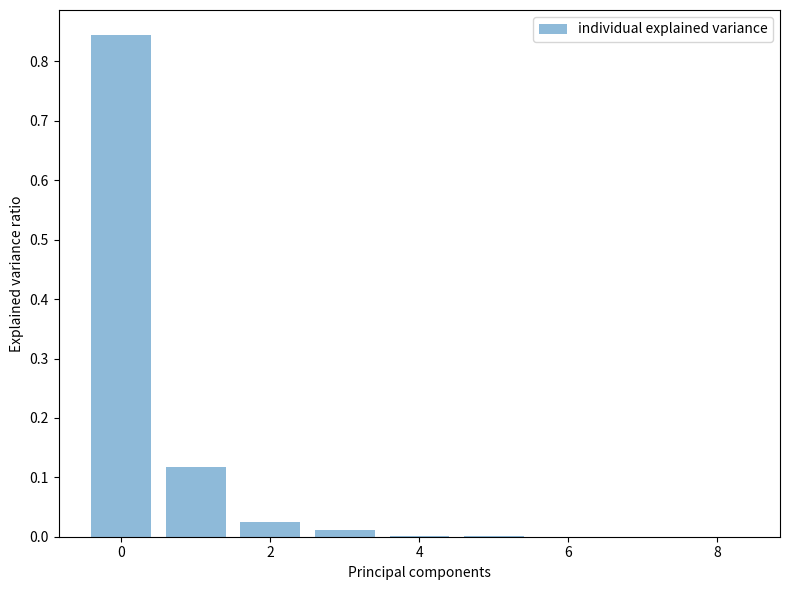

In [ ]:
# Plotting the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

The plot above confirms our observation that the first two principal components explain most of the variance in the data.

In conclusion, PCA is a powerful technique for dimensionality reduction. It allows us to reduce the number of variables in our data while retaining most of the information. This can be particularly useful in scenarios where we have a large number of variables, as it can help to simplify the data and make it easier to analyze and visualize.

In this notebook, we applied PCA to a finance dataset and managed to reduce its dimensionality from 9 to 2 while retaining more than 95% of the information. This is a significant reduction and demonstrates the effectiveness of PCA.